In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [3]:
# Load the dataset from the user-provided file
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"
df = pd.read_csv('/content/Datasets/Mall Dataset/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 14.17 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     4

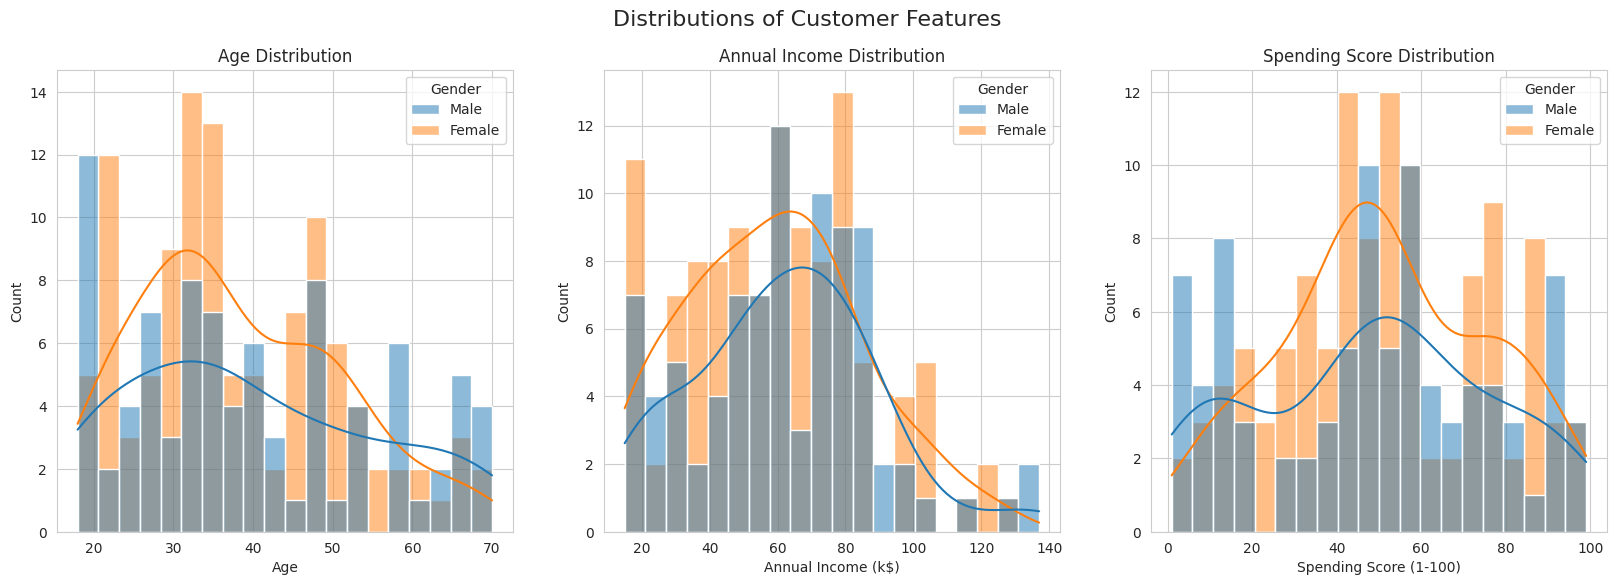

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

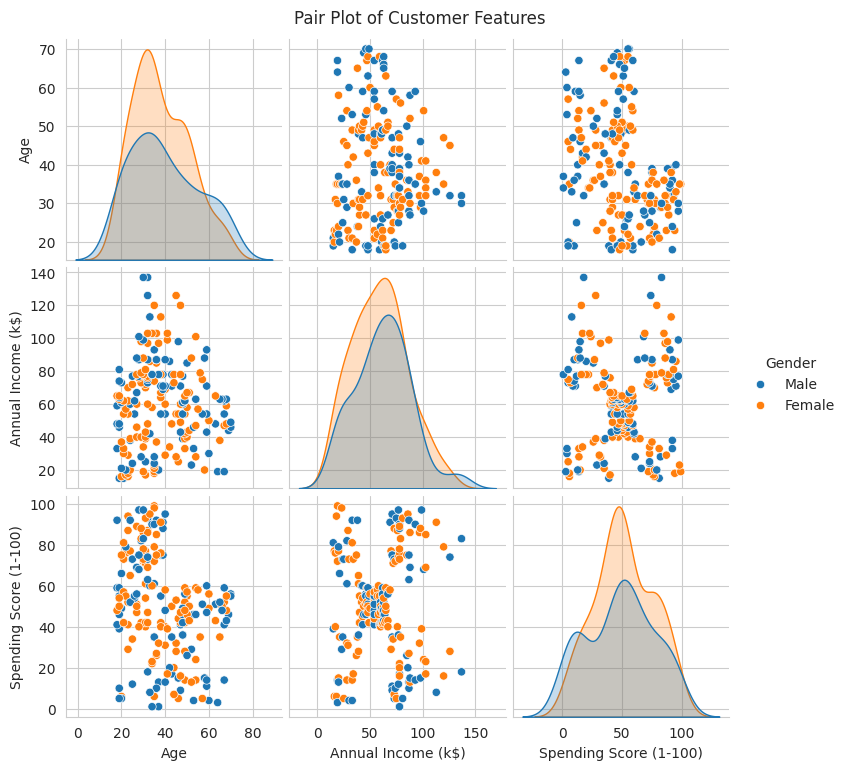

In [6]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

In [7]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

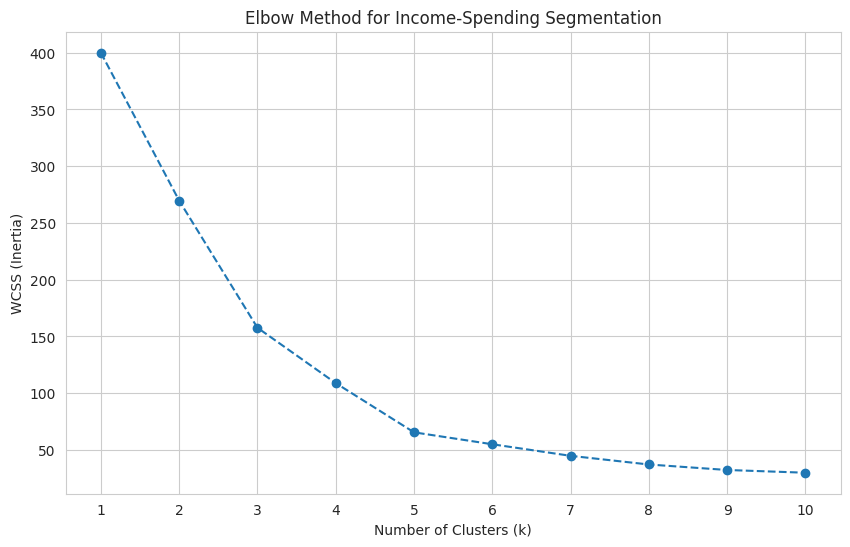

In [8]:
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [9]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

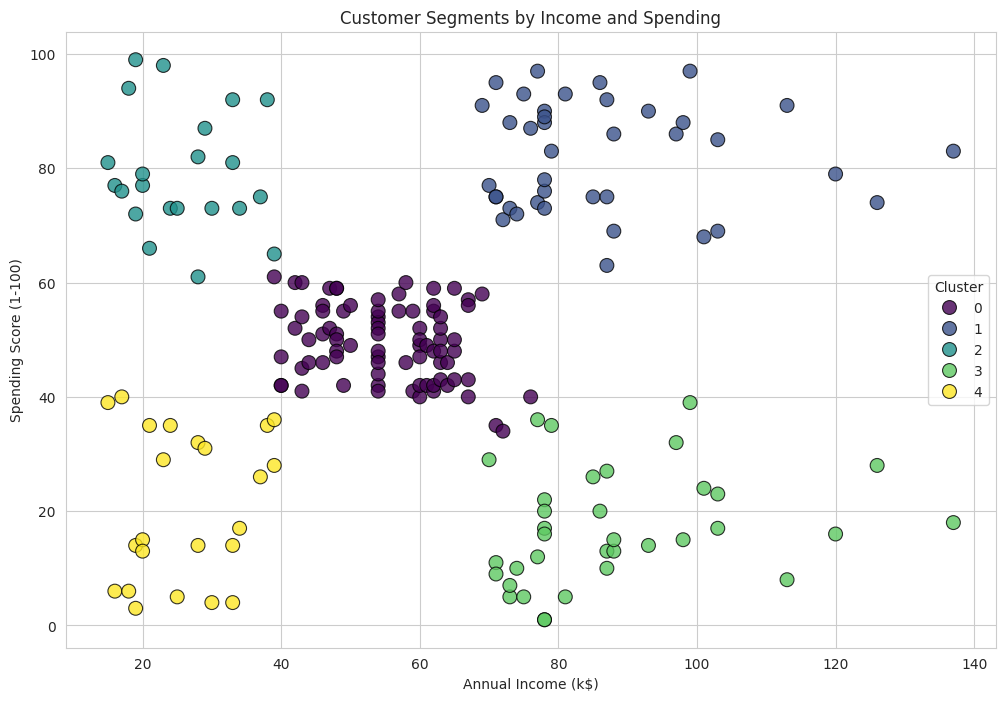

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [11]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


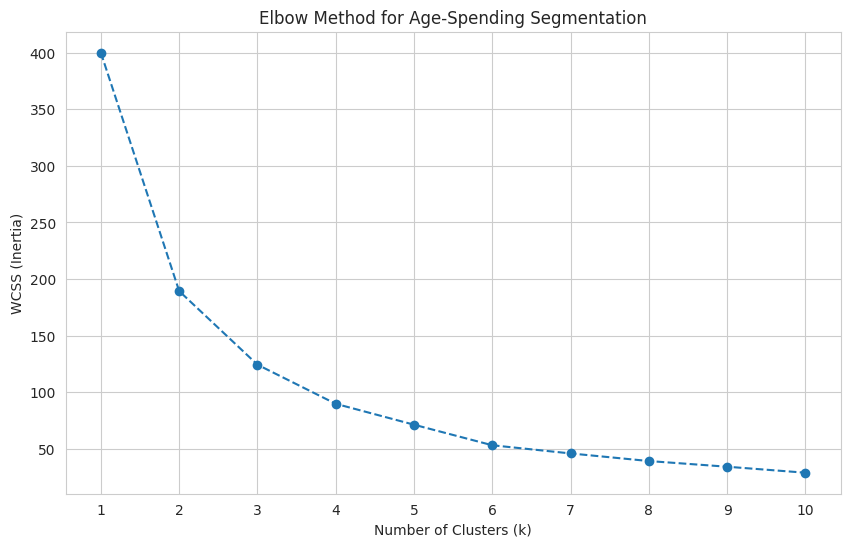

In [12]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

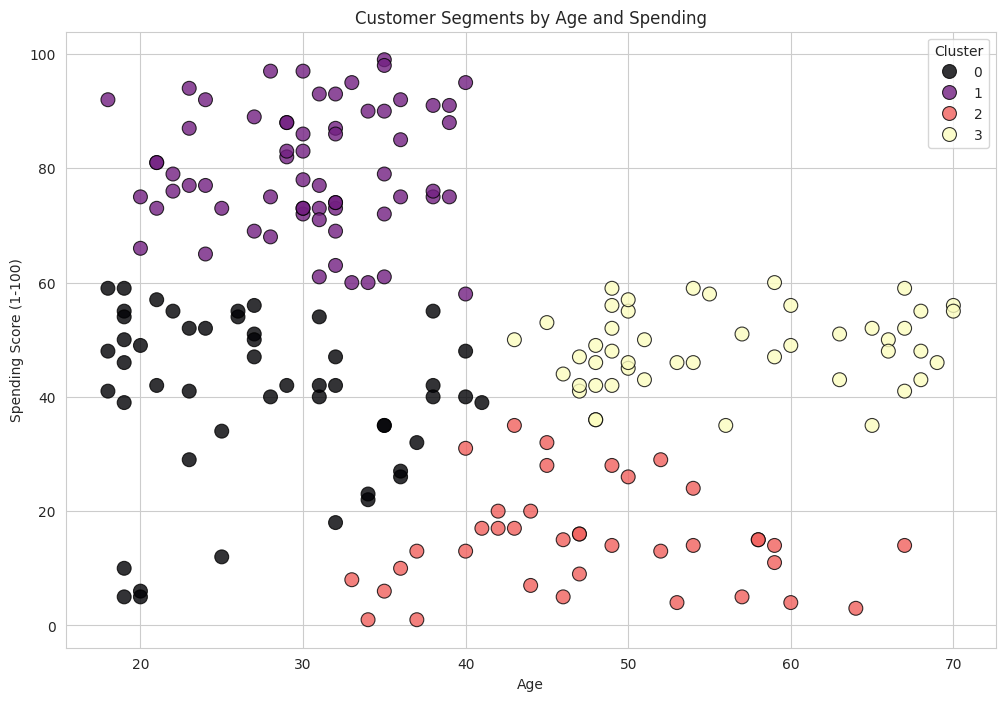

In [13]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

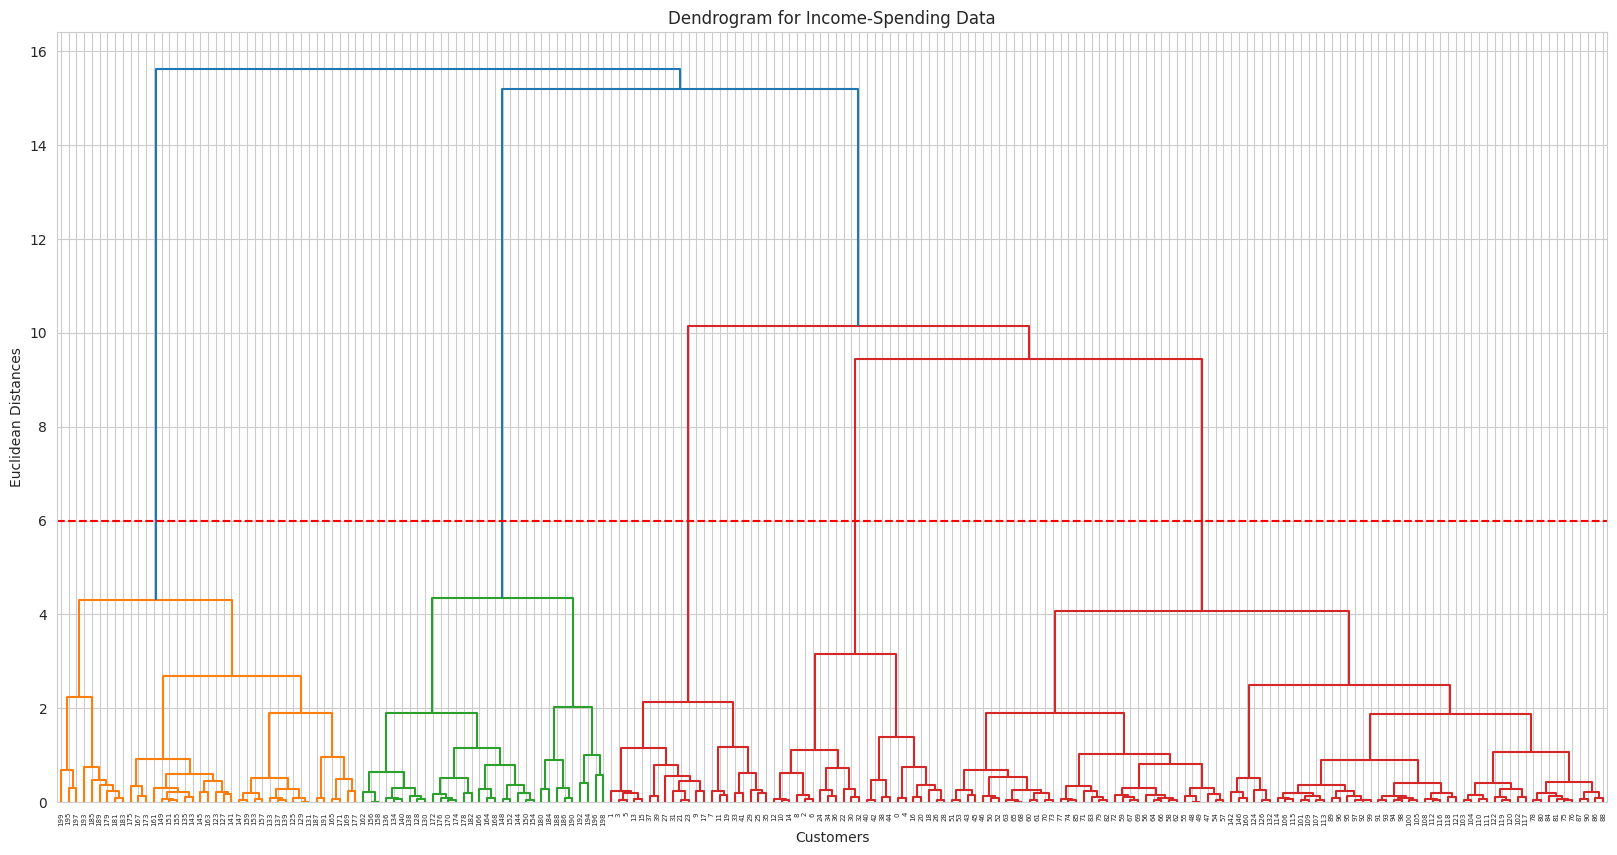

In [14]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

### Submission Criteria

Based on the project objectives and the insights gained from the initial analysis, here are the key criteria for your submission:

1.  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.
2.  **Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

   Gender  Spending Score (1-100)
0    Male                      39
1    Male                      81
2  Female                       6
3  Female                      77
4  Female                      40

Gender counts:
 Gender
Female    112
Male       88
Name: count, dtype: int64

--- Spending Score summary by Gender ---
        count   mean  median    std  min  max
Gender                                       
Female    112  51.53    50.0  24.11    5   99
Male       88  48.51    50.0  27.90    1   97


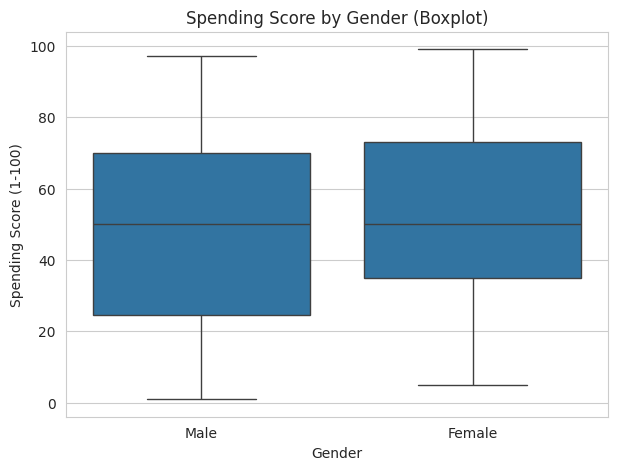

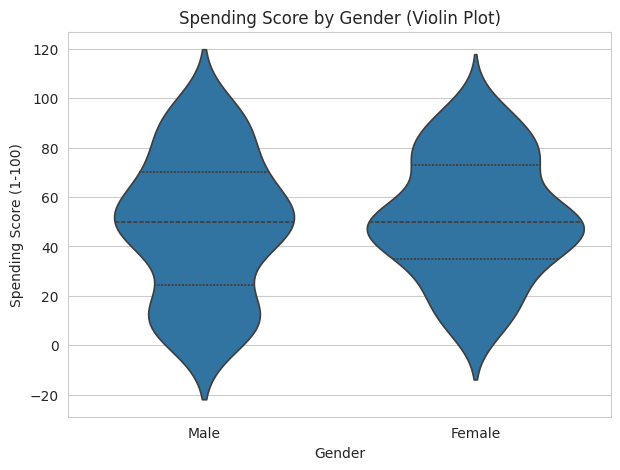

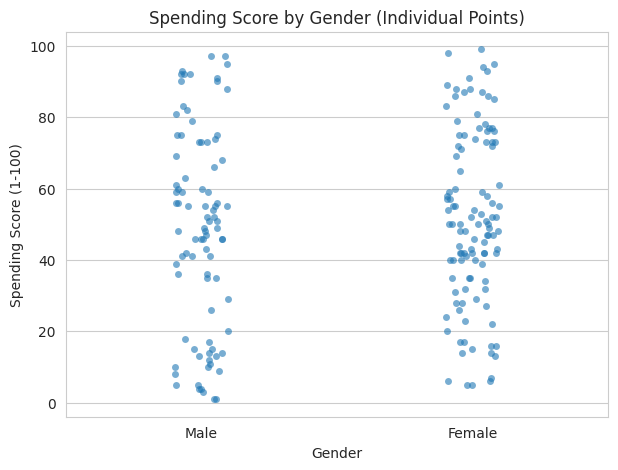

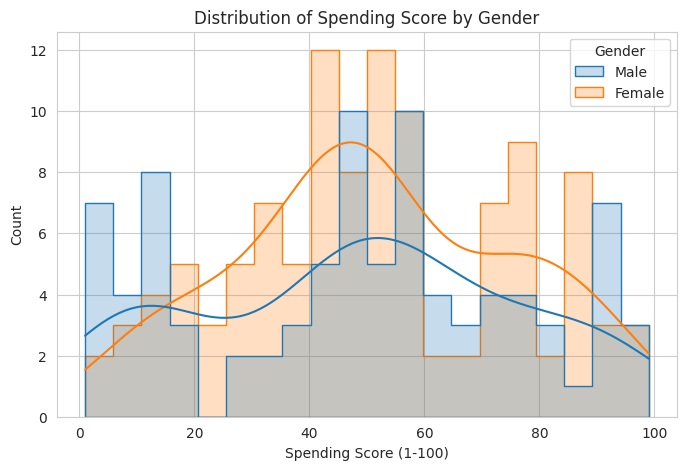


Welch t-test p-value: 0.4220
Mann–Whitney U p-value: 0.5713

Result: No statistically significant difference in spending score by gender at 0.05.


In [15]:
#Explore Gender vs. Spending Score: Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.
# ============================================================
# Explore Gender vs Spending Score (1-100)
# ============================================================

# 0) Quick sanity checks
print(df[['Gender', 'Spending Score (1-100)']].head())
print("\nGender counts:\n", df['Gender'].value_counts())

# 1) Summary statistics by gender
gender_summary = (
    df.groupby('Gender')['Spending Score (1-100)']
      .agg(count='count', mean='mean', median='median', std='std', min='min', max='max')
      .round(2)
)
print("\n--- Spending Score summary by Gender ---")
print(gender_summary)

# 2) Visualizations
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Spending Score by Gender (Boxplot)')
plt.show()

plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', inner='quartile')
plt.title('Spending Score by Gender (Violin Plot)')
plt.show()

plt.figure(figsize=(7,5))
sns.stripplot(data=df, x='Gender', y='Spending Score (1-100)', jitter=True, alpha=0.6)
plt.title('Spending Score by Gender (Individual Points)')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', kde=True, bins=20, element='step')
plt.title('Distribution of Spending Score by Gender')
plt.show()

# 3) (Optional but useful) Statistical significance test
from scipy.stats import ttest_ind, mannwhitneyu

male_scores = df.loc[df['Gender'] == 'Male', 'Spending Score (1-100)']
female_scores = df.loc[df['Gender'] == 'Female', 'Spending Score (1-100)']

# Welch's t-test (doesn't assume equal variances)
t_stat, t_p = ttest_ind(male_scores, female_scores, equal_var=False)
print(f"\nWelch t-test p-value: {t_p:.4f}")

# Mann–Whitney U (non-parametric alternative)
u_stat, u_p = mannwhitneyu(male_scores, female_scores, alternative='two-sided')
print(f"Mann–Whitney U p-value: {u_p:.4f}")

# 4) Quick interpretation helper
alpha = 0.05
if t_p < alpha or u_p < alpha:
    print("\nResult: Spending scores differ by gender (statistically significant at 0.05).")
else:
    print("\nResult: No statistically significant difference in spending score by gender at 0.05.")


✅ Engineered feature created: Value_Index = Spending Score / Annual Income


,Age,Annual Income (k$),Spending Score (1-100),Value_Index
0,19,15,39,2.600000
1,21,15,81,5.400000
2,20,16,6,0.375000
3,23,16,77,4.812500
4,31,17,40,2.352941


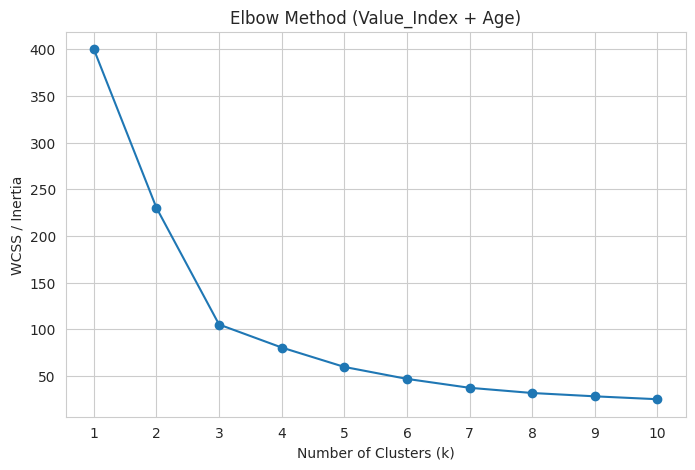

✅ KMeans fitted with k = 4


,Value_Index,Age,FE_Cluster
0,2.600000,19,2
1,5.400000,21,2
2,0.375000,20,3
3,4.812500,23,2
4,2.352941,31,2


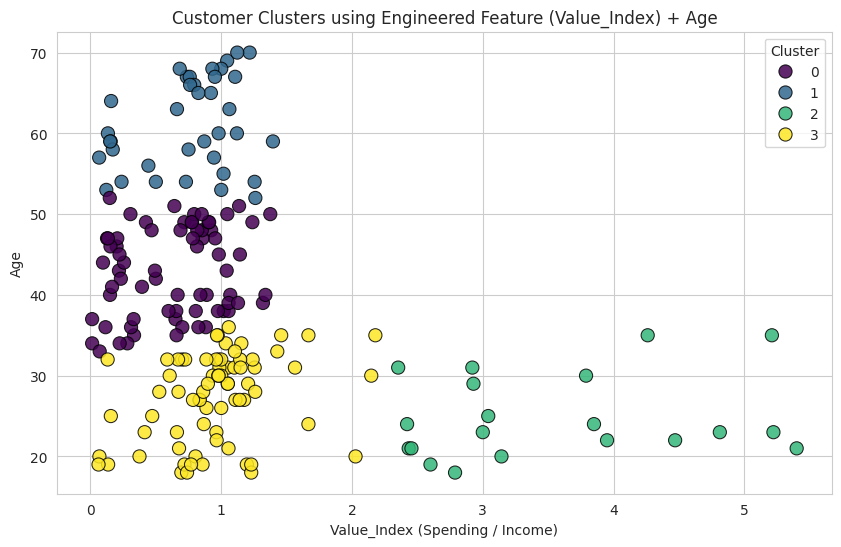

📌 Cluster Profiles (Interpretation Summary):


,count,avg_age,avg_income,avg_spending,avg_value_index
FE_Cluster,,,,,
0,70,42.94,67.93,39.13,0.64
1,37,61.19,52.84,37.65,0.76
2,20,24.85,23.00,77.55,3.55
3,73,27.44,67.70,59.68,0.96



Persona hints:
- Higher avg_value_index => spends a lot relative to income (high spend intensity)
- Lower avg_value_index  => cautious/low spend intensity relative to income
- Combine avg_age with value_index to label clusters (young-high, older-low, etc.)


In [16]:
# ==========================================================
# FEATURE ENGINEERING FOR CLUSTERING (COPY-PASTE READY)
# Creates an engineered feature, runs Elbow, fits KMeans,
# visualizes clusters, and prints cluster interpretation table.
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ---------------------------
# 0) Safety checks for columns
# ---------------------------
income_col = 'Annual Income (k$)'
spend_col  = 'Spending Score (1-100)'

required_cols = ['Age', income_col, spend_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns in df: {missing}\nAvailable columns: {list(df.columns)}")

# ---------------------------
# 1) Feature Engineering
# ---------------------------
# Engineered feature: Value_Index = Spending relative to Income
# (Higher => spends more compared to income)
epsilon = 1e-6
df['Value_Index'] = df[spend_col] / (df[income_col] + epsilon)

print("✅ Engineered feature created: Value_Index = Spending Score / Annual Income")
display(df[['Age', income_col, spend_col, 'Value_Index']].head())

# ---------------------------
# 2) Choose features for clustering
#    (engineered + existing)
# ---------------------------
X_fe = df[['Value_Index', 'Age']].copy()

# ---------------------------
# 3) Scale features
# ---------------------------
scaler = StandardScaler()
X_fe_scaled = scaler.fit_transform(X_fe)

# ---------------------------
# 4) Elbow Method to find optimal k
# ---------------------------
wcss = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X_fe_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), wcss, marker='o')
plt.title('Elbow Method (Value_Index + Age)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.xticks(list(k_range))
plt.grid(True)
plt.show()

# ---------------------------
# 5) Fit KMeans with chosen k
#    (Change k_opt after seeing elbow)
# ---------------------------
k_opt = 4  # <-- change this based on elbow plot "bend"

kmeans_fe = KMeans(n_clusters=k_opt, init='k-means++', random_state=42, n_init=10)
df['FE_Cluster'] = kmeans_fe.fit_predict(X_fe_scaled)

print(f"✅ KMeans fitted with k = {k_opt}")
display(df[['Value_Index', 'Age', 'FE_Cluster']].head())

# ---------------------------
# 6) Cluster Visualization
# ---------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Value_Index',
    y='Age',
    hue='FE_Cluster',
    palette='viridis',
    s=90,
    edgecolor='black',
    alpha=0.85
)
plt.title('Customer Clusters using Engineered Feature (Value_Index) + Age')
plt.xlabel('Value_Index (Spending / Income)')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ---------------------------
# 7) Cluster Profiling / Interpretation Table
# ---------------------------
profile = df.groupby('FE_Cluster').agg(
    count=('FE_Cluster', 'size'),
    avg_age=('Age', 'mean'),
    avg_income=(income_col, 'mean'),
    avg_spending=(spend_col, 'mean'),
    avg_value_index=('Value_Index', 'mean')
).round(2)

print("📌 Cluster Profiles (Interpretation Summary):")
display(profile)

# ---------------------------
# 8) Quick persona hints (optional)
# ---------------------------
print("\nPersona hints:")
print("- Higher avg_value_index => spends a lot relative to income (high spend intensity)")
print("- Lower avg_value_index  => cautious/low spend intensity relative to income")
print("- Combine avg_age with value_index to label clusters (young-high, older-low, etc.)")
